In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from nb_utils import read_params, filter_paths, sweepable_params, parse_logs, plot_measure

# **15 July**

## 0910_vseal_nopercep_hidden

scaling_w: [0.1, 0.2, 0.4]
output_dir: ['/checkpoint/pfz/2024_logs/0910_vseal_nopercep_hidden/_scaling_w=0.1', '/checkpoint/pfz/2024_logs/0910_vseal_nopercep_hidden/_scaling_w=0.2', '/checkpoint/pfz/2024_logs/0910_vseal_nopercep_hidden/_scaling_w=0.4']


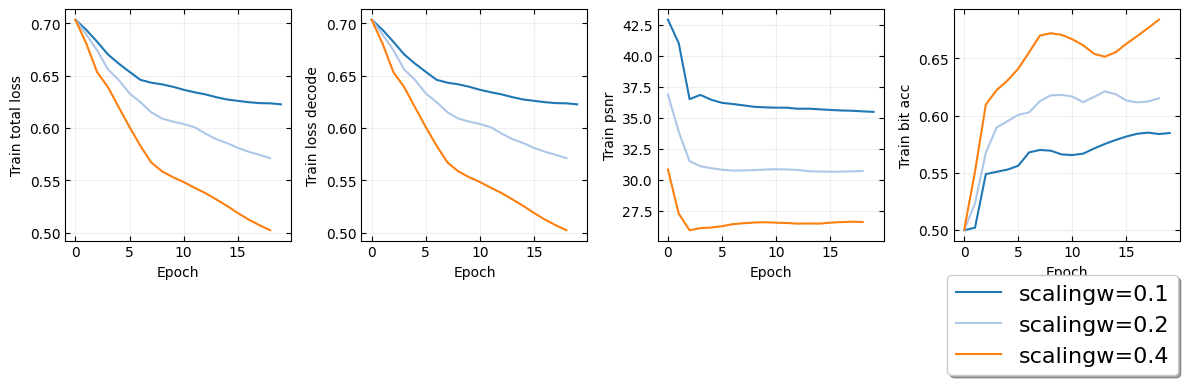

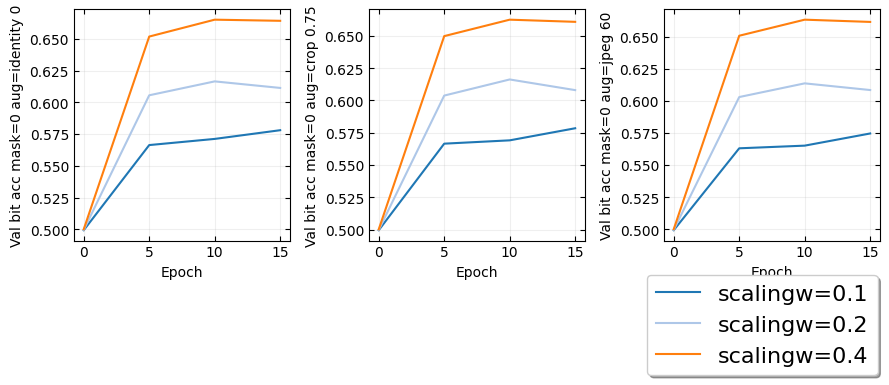

In [20]:
all_exp_dir = "/checkpoint/pfz/2024_logs/0910_vseal_nopercep_hidden"
filters = {
}

# load params and filter
params = read_params(os.path.join(all_exp_dir, 'params.txt'))
paths = filter_paths(params, filters)

# print sweepable parameters
sweepable = sweepable_params(params)
for k, v in sweepable.items():
    print(f"{k}: {v}")

# load dataframes
dfs = {}
list_scaling = []
for ii, path in enumerate(paths):
    exp_dir = os.path.join(all_exp_dir, path)
    param = params[path]
    try:
        logs = parse_logs(os.path.join(exp_dir, 'log.txt'), '')
        dfs[path] = pd.DataFrame.from_dict(logs).transpose()
    except:
        print(f"{path} is not found")

paths = dfs.keys()
try:
    epoch = max(dfs[path]['epoch'])
except:
    epoch=0
epoch = int(epoch - epoch % 5)
max_epoch = 2000

# 20 different colors
colors = plt.cm.tab20.colors
# colors = [ plt.cm.tab20.colors[2*ii] for ii in range(3) ] + [ plt.cm.tab20.colors[2*ii+1] for ii in range(3) ] 

def remove_outliers(df, measure):
    Q1 = df[measure].quantile(0.25)
    Q3 = df[measure].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[measure] >= lower_bound) & (df[measure] <= upper_bound)]

def plot_measure(measures, title=None):
    if len(measures) > 8:
        ncols = 8
        nrows = (len(measures) + 7) // 8  # Calculate the number of rows needed
    else:
        ncols = len(measures)
        nrows = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    for ii, path in enumerate(paths):
        df = dfs[path]
        param = params[path]
        for jj, measure in enumerate(measures):
            try:
                ax = axes[jj]
            except IndexError:
                continue  # Skip if there are more measures than axes available
            df = df.dropna(subset=[measure])
            # df = remove_outliers(df, measure)
            ax.plot(df['epoch'][:max_epoch], df[measure][:max_epoch], 
                    label=f"{path.replace('_', '')}" ,
                    # label=
                    #     f"lambda_i:{param['lambda_i']}, " +
                    #     f"lambda_d:{param['lambda_d']}, " +
                    #     f"embedder:{param['embedder_model']}, " +
                    #     f"scaling_w:{param['scaling_w']}",
                    color=colors[ii],
                    )
                    # label=f"{path.replace('_', '')}")
            ylabel = measure.replace('_', ' ').capitalize()
            # if 'acc' in ylabel: 
            #     ax.set_ylim(0.5, 1.01)
            ax.set_ylabel(ylabel)
            xlabel = 'Epoch'
            ax.set_xlabel(xlabel)
            ax.grid(True)
    if title is not None:
        plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    ax.legend(loc='upper right', bbox_to_anchor=(1.04, -0.1), fontsize=16, ncol=1, fancybox=True, shadow=True)
    plt.show()
    

measures = ['train_total_loss', 'train_loss_decode', 'train_psnr', 'train_bit_acc']
plot_measure(measures)

measures = ['val_bit_acc_mask=0_aug=identity_0', 'val_bit_acc_mask=0_aug=crop_0.75', 'val_bit_acc_mask=0_aug=jpeg_60'] 
plot_measure(measures)

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_bit_acc_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation Bit Accuracy')

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_miou_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation IoU')

## 0910_vseal_nopercep_unet

scaling_w: [0.1, 0.2, 0.4]
output_dir: ['/checkpoint/pfz/2024_logs/0910_vseal_nopercep_unet/_scaling_w=0.1', '/checkpoint/pfz/2024_logs/0910_vseal_nopercep_unet/_scaling_w=0.2', '/checkpoint/pfz/2024_logs/0910_vseal_nopercep_unet/_scaling_w=0.4']


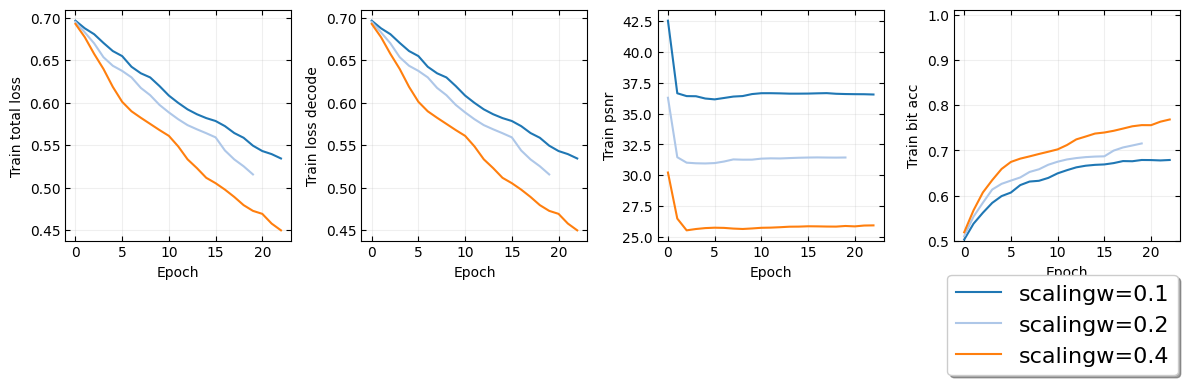

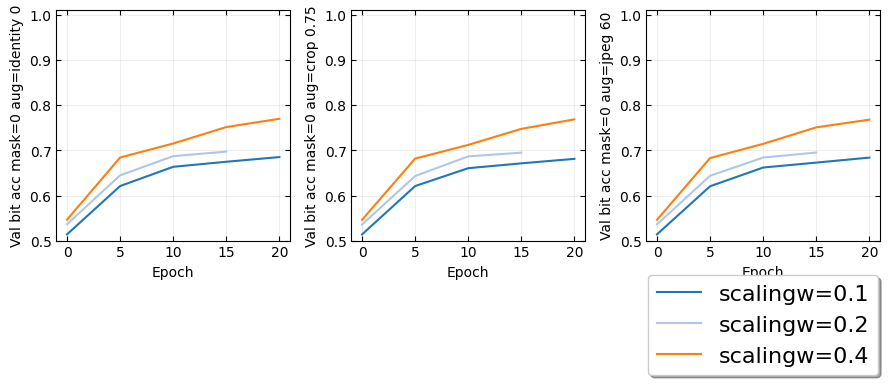

In [22]:
all_exp_dir = "/checkpoint/pfz/2024_logs/0910_vseal_nopercep_unet"
filters = {
}

# load params and filter
params = read_params(os.path.join(all_exp_dir, 'params.txt'))
paths = filter_paths(params, filters)

# print sweepable parameters
sweepable = sweepable_params(params)
for k, v in sweepable.items():
    print(f"{k}: {v}")

# load dataframes
dfs = {}
list_scaling = []
for ii, path in enumerate(paths):
    exp_dir = os.path.join(all_exp_dir, path)
    param = params[path]
    try:
        logs = parse_logs(os.path.join(exp_dir, 'log.txt'), '')
        dfs[path] = pd.DataFrame.from_dict(logs).transpose()
    except:
        print(f"{path} is not found")

paths = dfs.keys()
try:
    epoch = max(dfs[path]['epoch'])
except:
    epoch=0
epoch = int(epoch - epoch % 5)
max_epoch = 2000

# 20 different colors
colors = plt.cm.tab20.colors
# colors = [ plt.cm.tab20.colors[2*ii] for ii in range(3) ] + [ plt.cm.tab20.colors[2*ii+1] for ii in range(3) ] 

def remove_outliers(df, measure):
    Q1 = df[measure].quantile(0.25)
    Q3 = df[measure].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[measure] >= lower_bound) & (df[measure] <= upper_bound)]

def plot_measure(measures, title=None):
    if len(measures) > 8:
        ncols = 8
        nrows = (len(measures) + 7) // 8  # Calculate the number of rows needed
    else:
        ncols = len(measures)
        nrows = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    for ii, path in enumerate(paths):
        df = dfs[path]
        param = params[path]
        for jj, measure in enumerate(measures):
            try:
                ax = axes[jj]
            except IndexError:
                continue  # Skip if there are more measures than axes available
            df = df.dropna(subset=[measure])
            # df = remove_outliers(df, measure)
            ax.plot(df['epoch'][:max_epoch], df[measure][:max_epoch], 
                    label=f"{path.replace('_', '')}" ,
                    # label=
                    #     f"lambda_i:{param['lambda_i']}, " +
                    #     f"lambda_d:{param['lambda_d']}, " +
                    #     f"embedder:{param['embedder_model']}, " +
                    #     f"scaling_w:{param['scaling_w']}",
                    color=colors[ii],
                    )
                    # label=f"{path.replace('_', '')}")
            ylabel = measure.replace('_', ' ').capitalize()
            if 'acc' in ylabel: 
                ax.set_ylim(0.5, 1.01)
            ax.set_ylabel(ylabel)
            xlabel = 'Epoch'
            ax.set_xlabel(xlabel)
            ax.grid(True)
    if title is not None:
        plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    ax.legend(loc='upper right', bbox_to_anchor=(1.04, -0.1), fontsize=16, ncol=1, fancybox=True, shadow=True)
    plt.show()
    

measures = ['train_total_loss', 'train_loss_decode', 'train_psnr', 'train_bit_acc']
plot_measure(measures)

measures = ['val_bit_acc_mask=0_aug=identity_0', 'val_bit_acc_mask=0_aug=crop_0.75', 'val_bit_acc_mask=0_aug=jpeg_60']
plot_measure(measures)

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_bit_acc_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation Bit Accuracy')

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_miou_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation IoU')

## 0910_vseal_nopercep

lambda_dec: [1.0, 4.0]
output_dir: ['/checkpoint/pfz/2024_logs/0910_vseal_nopercep/_lambda_dec=1.0', '/checkpoint/pfz/2024_logs/0910_vseal_nopercep/_lambda_dec=4.0']


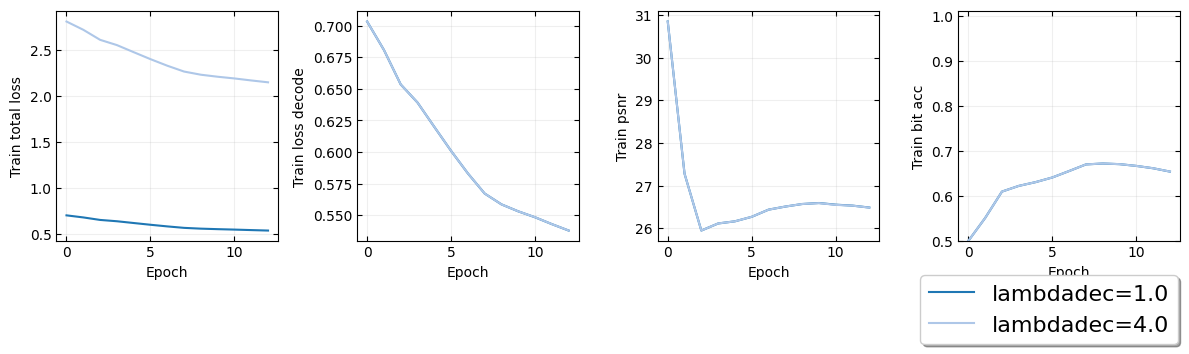

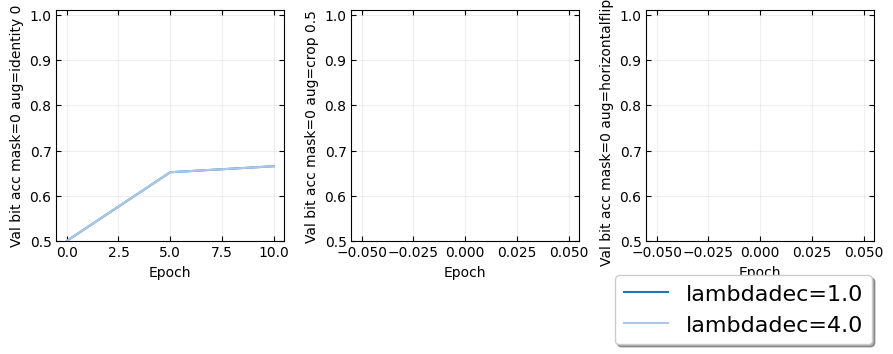

In [3]:
all_exp_dir = "/checkpoint/pfz/2024_logs/0910_vseal_nopercep"
filters = {
}

# load params and filter
params = read_params(os.path.join(all_exp_dir, 'params.txt'))
paths = filter_paths(params, filters)

# print sweepable parameters
sweepable = sweepable_params(params)
for k, v in sweepable.items():
    print(f"{k}: {v}")

# load dataframes
dfs = {}
list_scaling = []
for ii, path in enumerate(paths):
    exp_dir = os.path.join(all_exp_dir, path)
    param = params[path]
    try:
        logs = parse_logs(os.path.join(exp_dir, 'log.txt'), '')
        dfs[path] = pd.DataFrame.from_dict(logs).transpose()
    except:
        print(f"{path} is not found")

paths = dfs.keys()
try:
    epoch = max(dfs[path]['epoch'])
except:
    epoch=0
epoch = int(epoch - epoch % 5)
max_epoch = 2000

# 20 different colors
colors = plt.cm.tab20.colors
# colors = [ plt.cm.tab20.colors[2*ii] for ii in range(3) ] + [ plt.cm.tab20.colors[2*ii+1] for ii in range(3) ] 

def remove_outliers(df, measure):
    Q1 = df[measure].quantile(0.25)
    Q3 = df[measure].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[measure] >= lower_bound) & (df[measure] <= upper_bound)]

def plot_measure(measures, title=None):
    if len(measures) > 8:
        ncols = 8
        nrows = (len(measures) + 7) // 8  # Calculate the number of rows needed
    else:
        ncols = len(measures)
        nrows = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    for ii, path in enumerate(paths):
        df = dfs[path]
        param = params[path]
        for jj, measure in enumerate(measures):
            try:
                ax = axes[jj]
            except IndexError:
                continue  # Skip if there are more measures than axes available
            df = df.dropna(subset=[measure])
            # df = remove_outliers(df, measure)
            ax.plot(df['epoch'][:max_epoch], df[measure][:max_epoch], 
                    label=f"{path.replace('_', '')}" ,
                    # label=
                    #     f"lambda_i:{param['lambda_i']}, " +
                    #     f"lambda_d:{param['lambda_d']}, " +
                    #     f"embedder:{param['embedder_model']}, " +
                    #     f"scaling_w:{param['scaling_w']}",
                    color=colors[ii],
                    )
                    # label=f"{path.replace('_', '')}")
            ylabel = measure.replace('_', ' ').capitalize()
            if 'acc' in ylabel: 
                ax.set_ylim(0.5, 1.01)
            ax.set_ylabel(ylabel)
            xlabel = 'Epoch'
            ax.set_xlabel(xlabel)
            ax.grid(True)
    if title is not None:
        plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    ax.legend(loc='upper right', bbox_to_anchor=(1.04, -0.1), fontsize=16, ncol=1, fancybox=True, shadow=True)
    plt.show()
    

measures = ['train_total_loss', 'train_loss_decode', 'train_psnr', 'train_bit_acc']
plot_measure(measures)

measures = ['val_bit_acc_mask=0_aug=identity_0', 'val_bit_acc_mask=0_aug=crop_0.5', 'val_bit_acc_mask=0_aug=horizontalflip_0']
plot_measure(measures)

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_bit_acc_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation Bit Accuracy')

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_miou_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation IoU')

## minimal reprod

balanced: ['True', 'False']
lambda_dec: [1.0, 4.0]
output_dir: ['/checkpoint/pfz/2024_logs/hidden_minimal/_balanced=True_lambda_dec=1.0', '/checkpoint/pfz/2024_logs/hidden_minimal/_balanced=True_lambda_dec=4.0', '/checkpoint/pfz/2024_logs/hidden_minimal/_balanced=False_lambda_dec=1.0', '/checkpoint/pfz/2024_logs/hidden_minimal/_balanced=False_lambda_dec=4.0']


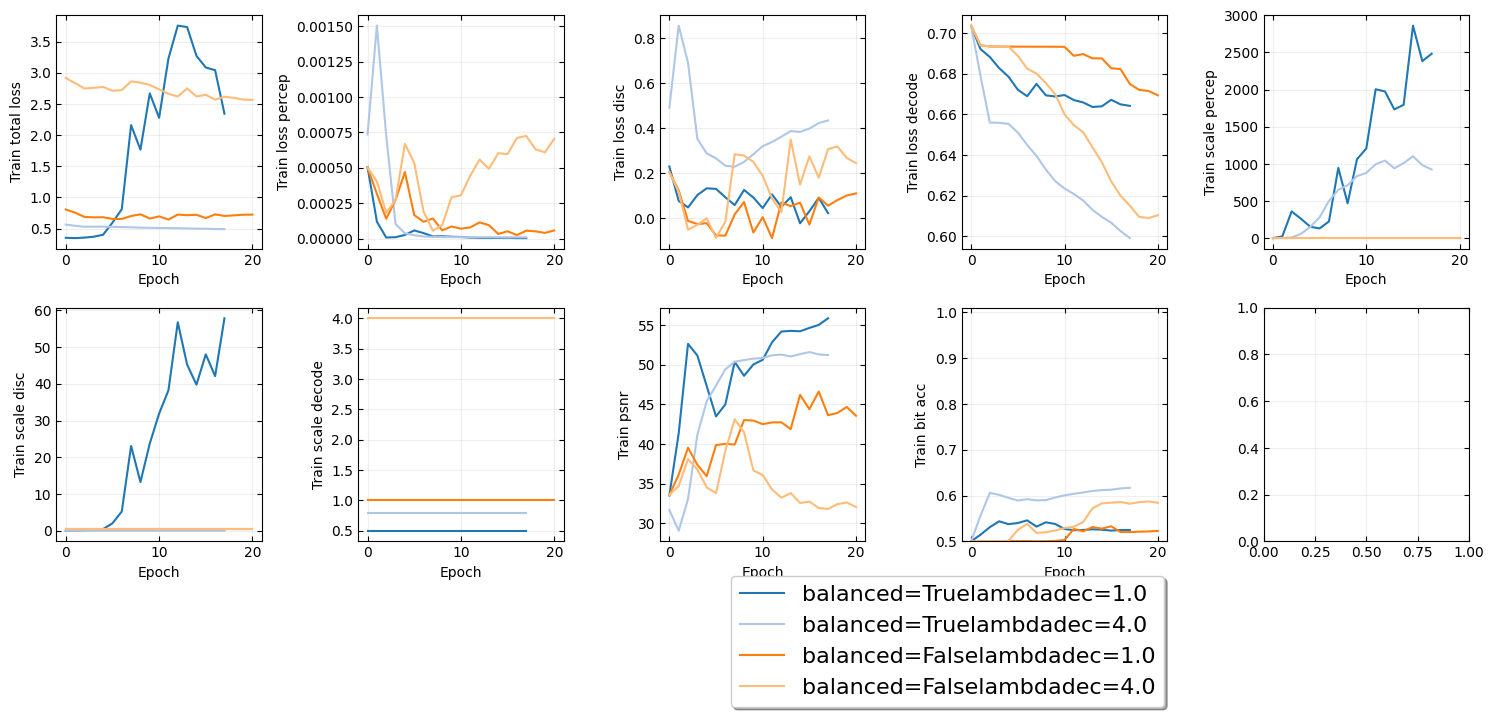

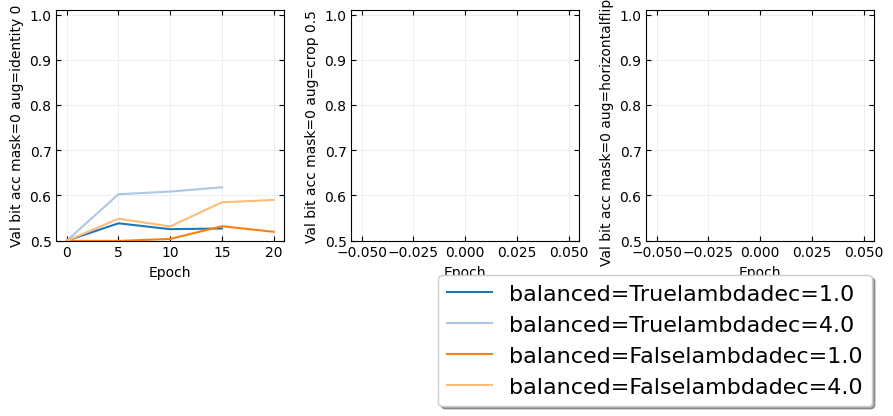

In [6]:
all_exp_dir = "/checkpoint/pfz/2024_logs/hidden_minimal"
# all_exp_dir = "/checkpoint/pfz/2024_logs/hidden_minimal_balanced"
filters = {
}

# load params and filter
params = read_params(os.path.join(all_exp_dir, 'params.txt'))
paths = filter_paths(params, filters)

# print sweepable parameters
sweepable = sweepable_params(params)
for k, v in sweepable.items():
    print(f"{k}: {v}")

# load dataframes
dfs = {}
list_scaling = []
for ii, path in enumerate(paths):
    exp_dir = os.path.join(all_exp_dir, path)
    param = params[path]
    try:
        logs = parse_logs(os.path.join(exp_dir, 'log.txt'), '')
        dfs[path] = pd.DataFrame.from_dict(logs).transpose()
    except:
        print(f"{path} is not found")

paths = dfs.keys()
try:
    epoch = max(dfs[path]['epoch'])
except:
    epoch=0
epoch = int(epoch - epoch % 5)
max_epoch = 2000

# 20 different colors
colors = plt.cm.tab20.colors
# colors = [ plt.cm.tab20.colors[2*ii] for ii in range(3) ] + [ plt.cm.tab20.colors[2*ii+1] for ii in range(3) ] 

def remove_outliers(df, measure):
    Q1 = df[measure].quantile(0.25)
    Q3 = df[measure].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[measure] >= lower_bound) & (df[measure] <= upper_bound)]

def plot_measure(measures, title=None, ncols=5):
    if len(measures) > ncols:
        ncols = ncols
        nrows = (len(measures) + ncols-1) // ncols  # Calculate the number of rows needed
    else:
        ncols = len(measures)
        nrows = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    for ii, path in enumerate(paths):
        df = dfs[path]
        param = params[path]
        for jj, measure in enumerate(measures):
            try:
                ax = axes[jj]
            except IndexError:
                continue  # Skip if there are more measures than axes available
            df = df.dropna(subset=[measure])
            # df = remove_outliers(df, measure)
            ax.plot(df['epoch'][:max_epoch], df[measure][:max_epoch], 
                    label=f"{path.replace('_', '')}" ,
                    # label=
                    #     f"lambda_i:{param['lambda_i']}, " +
                    #     f"lambda_d:{param['lambda_d']}, " +
                    #     f"embedder:{param['embedder_model']}, " +
                    #     f"scaling_w:{param['scaling_w']}",
                    color=colors[ii],
                    )
                    # label=f"{path.replace('_', '')}")
            ylabel = measure.replace('_', ' ').capitalize()
            if 'acc' in ylabel: 
                ax.set_ylim(0.5, 1.01)
            ax.set_ylabel(ylabel)
            xlabel = 'Epoch'
            ax.set_xlabel(xlabel)
            ax.grid(True)
    if title is not None:
        plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    ax.legend(loc='upper right', bbox_to_anchor=(1.04, -0.1), fontsize=16, ncol=1, fancybox=True, shadow=True)
    plt.show()
    

measures = ['train_total_loss', 'train_loss_percep', 'train_loss_disc', 'train_loss_decode', 'train_scale_percep', 'train_scale_disc', 'train_scale_decode', 'train_psnr', 'train_bit_acc']
plot_measure(measures)

measures = ['val_bit_acc_mask=0_aug=identity_0', 'val_bit_acc_mask=0_aug=crop_0.5', 'val_bit_acc_mask=0_aug=horizontalflip_0']
plot_measure(measures)

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_bit_acc_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation Bit Accuracy')

# augs = ["brightness_0.5", "brightness_1.5", "contrast_0.5", "contrast_1.5", "saturation_0.5", "saturation_1.5", "hue_-0.5", "hue_-0.25", "hue_0.25", "hue_0.5", "jpeg_40", "jpeg_60", "jpeg_80", "gaussianblur_3", "gaussianblur_5", "gaussianblur_9", "gaussianblur_17", "medianfilter_3", "medianfilter_5", "medianfilter_9", "medianfilter_17", "rotate_10", "rotate_30", "rotate_45", "rotate_90", "resize_0.5", "resize_0.75", "crop_0.5", "crop_0.75", "perspective_0.2", "perspective_0.5", "perspective_0.8", "horizontalflip_0"]
# measures = [f"val_miou_mask=1_aug={aug}" for aug in augs]
# plot_measure(measures, title='Validation IoU')

_balanced=True_lambda_dec=1.0
PSNR: 52.68637787359479
Linf: 4


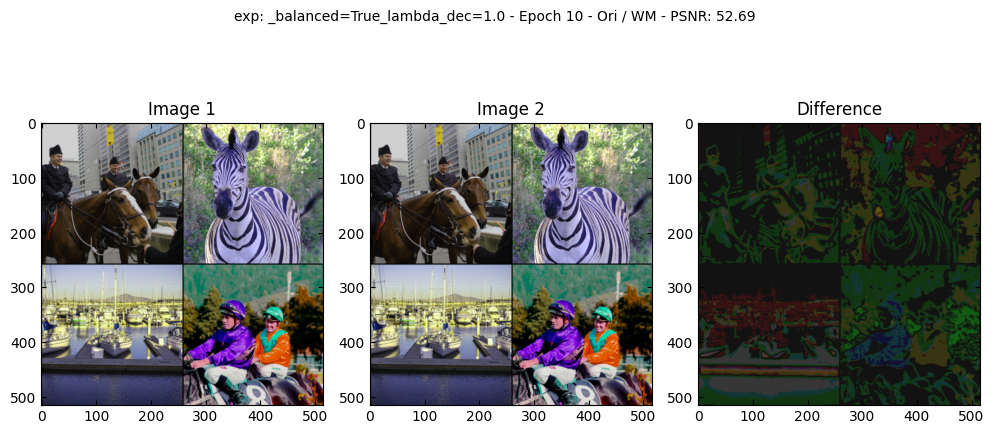

_balanced=True_lambda_dec=1.0 is not found
_balanced=True_lambda_dec=4.0
PSNR: 49.24691076882087
Linf: 14


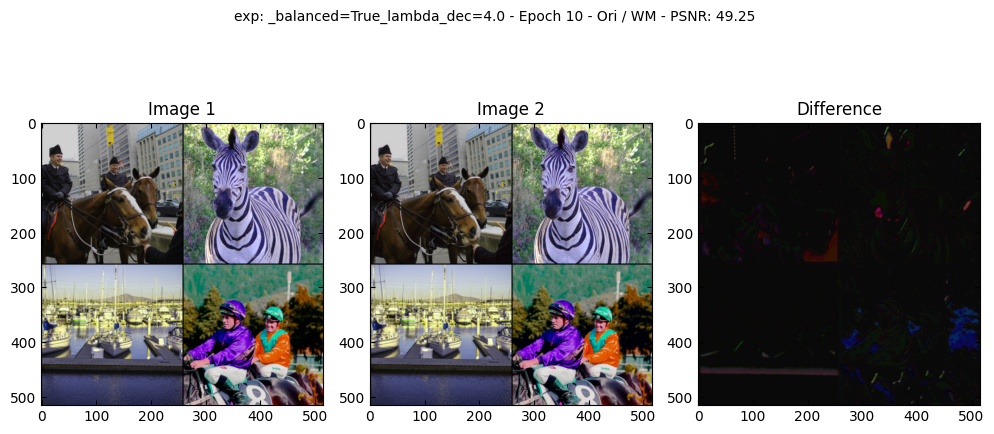

_balanced=True_lambda_dec=4.0 is not found
_balanced=False_lambda_dec=1.0
PSNR: 46.09817151013557
Linf: 3


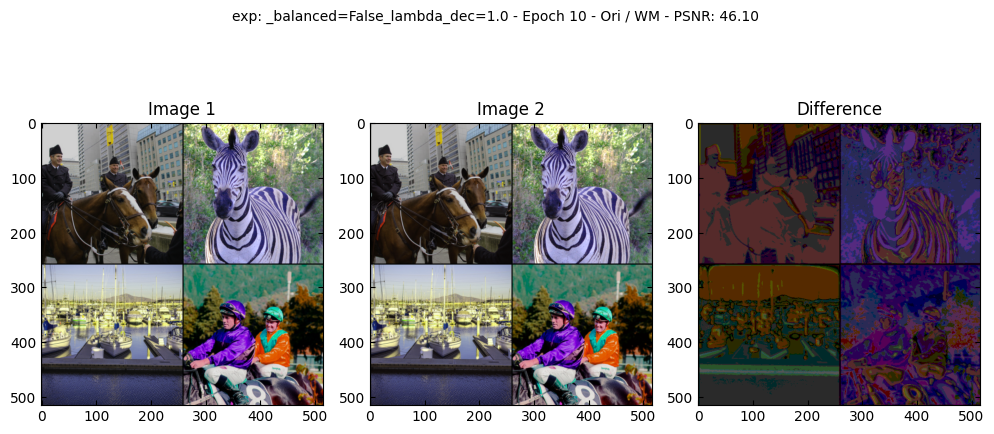

_balanced=False_lambda_dec=1.0 is not found
_balanced=False_lambda_dec=4.0
PSNR: 34.52191397290634
Linf: 22


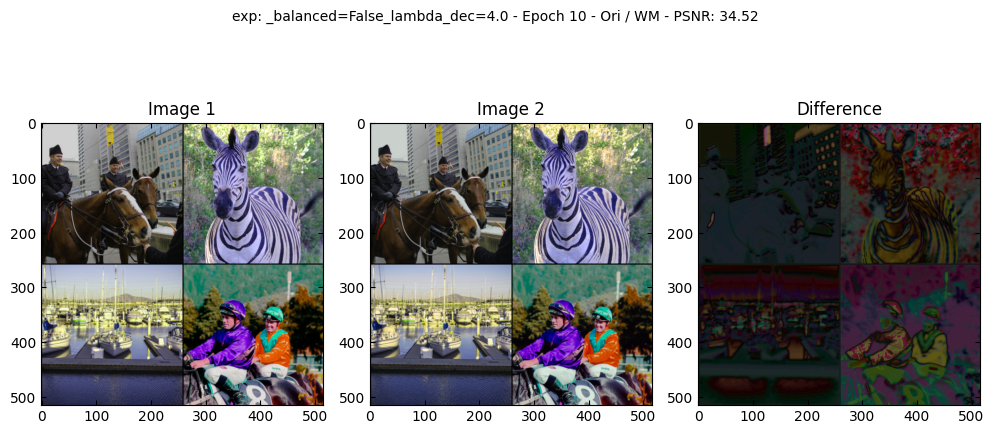

_balanced=False_lambda_dec=4.0 is not found


In [13]:
epoch = 10
figsize = (10, 5)
for exp_key in paths:
    print(exp_key)
    try:
        path_img_o = f"{all_exp_dir}/{exp_key}/{epoch:03d}_000_train_0_ori.png"
        path_img_w = f"{all_exp_dir}/{exp_key}/{epoch:03d}_000_train_1_w.png"
        path_img_aug = f"{all_exp_dir}/{exp_key}/{epoch:03d}_000_train_3_aug.png"
        path_mask = f"{all_exp_dir}/{exp_key}/{epoch:03d}_000_train_4_mask.png"
        path_pred = f"{all_exp_dir}/{exp_key}/{epoch:03d}_000_train_5_pred.png"
        path_val = f"{all_exp_dir}/{exp_key}/{epoch:03d}_val_full.png"

        img_o = Image.open(path_img_o)
        img_w = Image.open(path_img_w)
        img_aug = Image.open(path_img_aug)
        crop_size = (256 * 2 + 4, 256 * 2 + 4)
        visu_diff(img_o, img_w, title=f"exp: {exp_key} - Epoch {epoch} - Ori / WM", figsize=figsize, hori=True, crop=crop_size)
        
        # mask = Image.open(path_mask)
        # pred = Image.open(path_pred) 
        # # threshold pred 
        # pred = np.array(pred)
        # pred[pred<128] = 0
        # pred[pred>=128] = 255
        # pred = Image.fromarray(pred)
        # visu_diff(mask, pred, title=f"exp: {exp_key} - Epoch {epoch} - Mask / Pred", figsize=figsize, hori=True, crop=crop_size)
        
        val = Image.open(path_val)
        plt.figure(figsize=(3, 3))
        plt.imshow(val)
        plt.title('Validation')
        plt.tight_layout()
        plt.show()
    except:
        print(f"{exp_key} is not found")
        continue